In [12]:

import os
import sys
import ot 
import torch 

# Set wd
print(os.getcwd())

import matplotlib.pyplot as plt
import numpy as np

nbr_bins = 5

/home/samuel/Documents/projects/seq posterior approx w nf/seq posterior approx w nf dev/lotka_volterra/sbc


In [13]:
# set style
plt.style.use('seaborn')
plt.rcParams['lines.markeredgewidth'] = 1

# only use type 1 fonts in figures
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True

In [14]:
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))


def read_posterior_samples(p):
    return np.loadtxt(p, delimiter=",")

In [15]:
from scipy.stats import binom
from scipy.stats import chi2

#chi2


In [91]:
lower = binom.ppf(0.005, 100, 1/nbr_bins)
upper = binom.ppf(0.995, 100, 1/nbr_bins)

In [92]:
lower

10.0

In [93]:
upper

31.0

In [73]:
100*1/nbr_bins

20.0

# SNL

In [26]:
snl_ranks = np.zeros((100,4))

for i in range(100):
    snl_ranks[i,:] = read_posterior_samples("ranks_snl_"+str(i+1)+".csv")

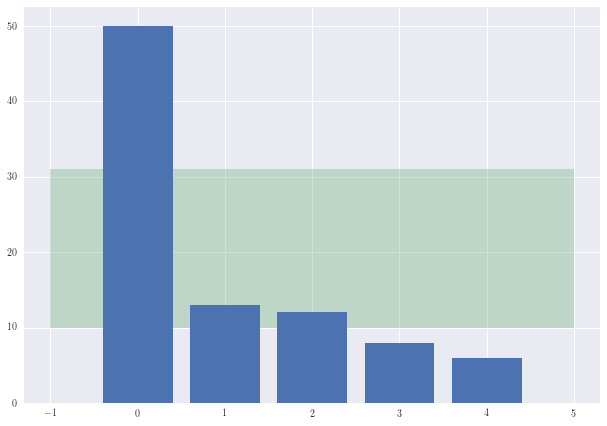

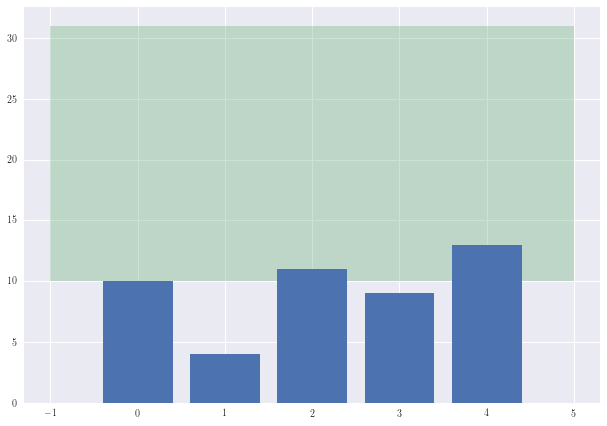

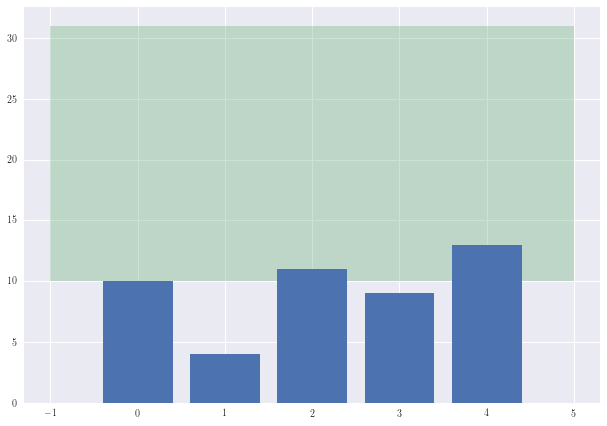

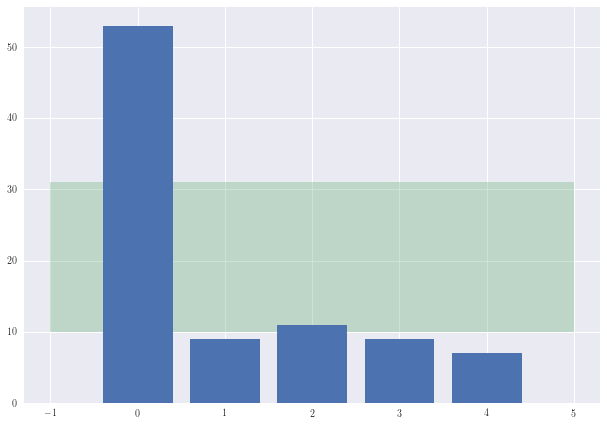

In [27]:
theta_ranks = [snl_ranks[:,0], snl_ranks[:,2], snl_ranks[:,2], snl_ranks[:,3]]

for t in theta_ranks:

    nbr_in_bin = np.zeros((1,nbr_bins))

    for i in range(nbr_bins):
        nbr_in_bin[0,i] = sum(t == i)
        
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(np.arange(nbr_bins), nbr_in_bin[0,:])
    ax.fill_between(np.arange(-1, nbr_bins+1, 1),lower*np.ones(nbr_bins+2),upper*np.ones(nbr_bins+2), alpha = 0.3)

# SNPE-C

In [37]:
snpe_c_ranks = np.zeros((100,4))

for i in range(100):
    snpe_c_ranks[i,:] = read_posterior_samples("ranks_snpec_"+str(i+1)+".csv")

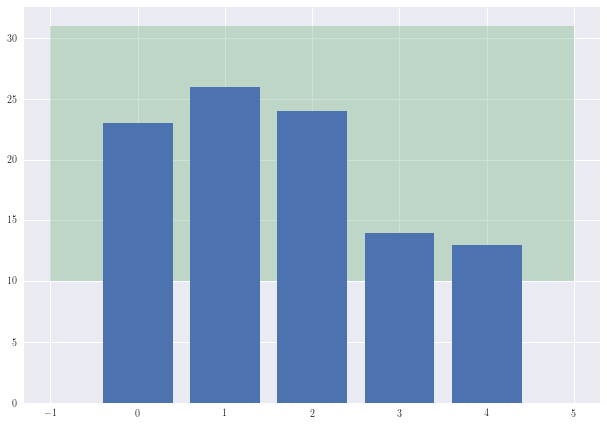

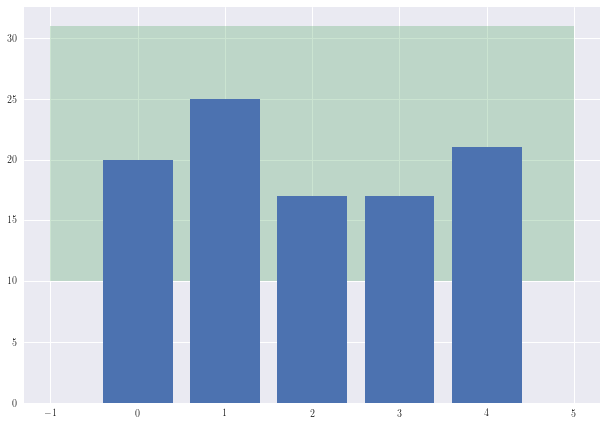

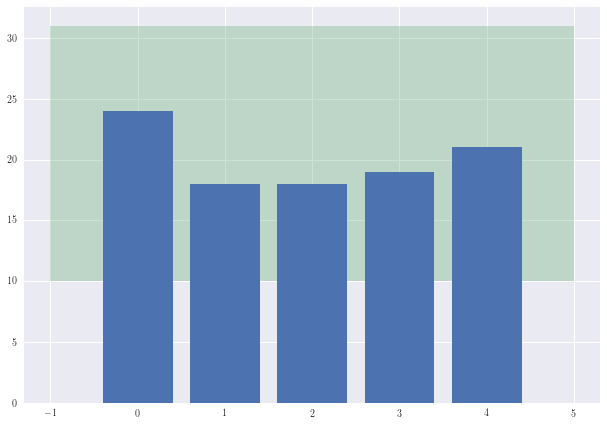

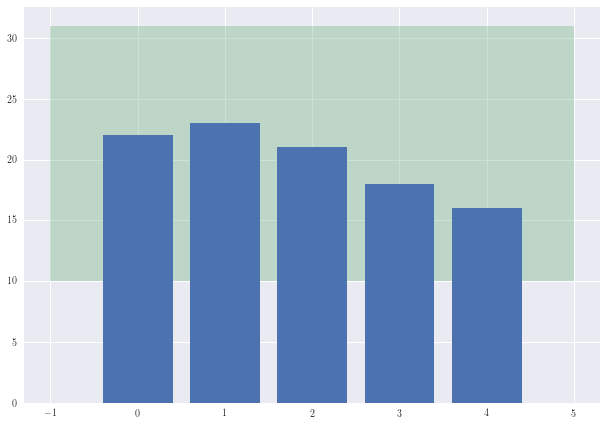

In [38]:
theta_ranks = [snpe_c_ranks[:,0], snpe_c_ranks[:,1], snpe_c_ranks[:,2], snpe_c_ranks[:,3]]

for t in theta_ranks:

    nbr_in_bin = np.zeros((1,nbr_bins))

    for i in range(nbr_bins):
        nbr_in_bin[0,i] = sum(t == i)
        
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(np.arange(nbr_bins), nbr_in_bin[0,:])
    ax.fill_between(np.arange(-1, nbr_bins+1, 1),lower*np.ones(nbr_bins+2),upper*np.ones(nbr_bins+2), alpha = 0.3)

# SNPLA

In [35]:
snpla_ranks = np.zeros((99,4))
counter = 0
for i in range(100):
    if i != 8:
        snpla_ranks[counter,:] = read_posterior_samples("ranks_snpla_"+str(i+1)+".csv")
        counter = counter + 1 

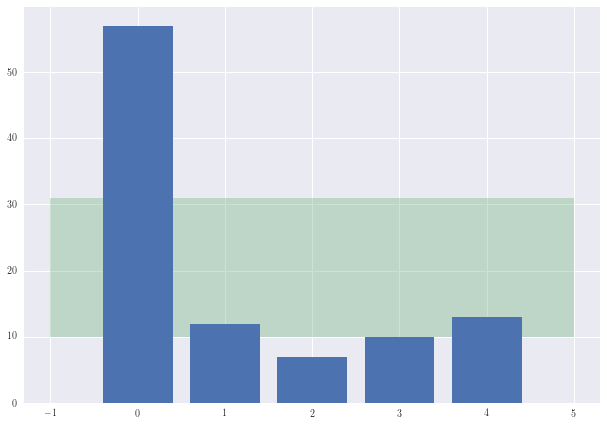

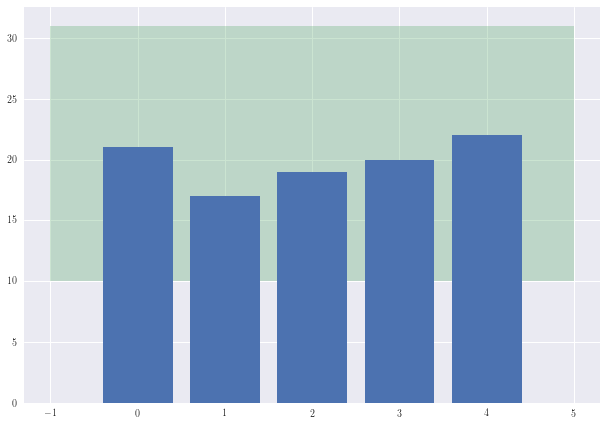

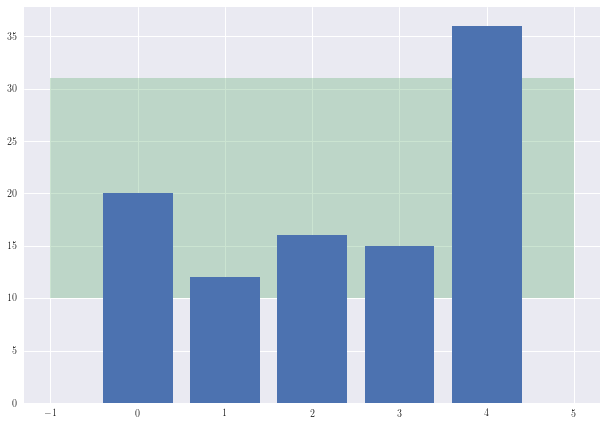

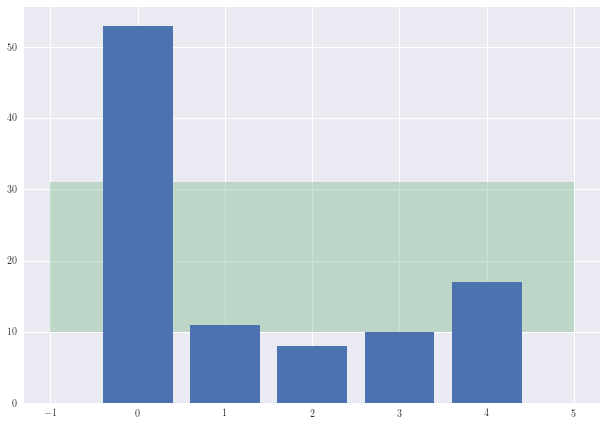

In [36]:
theta_ranks = [snpla_ranks[:,0], snpla_ranks[:,1], snpla_ranks[:,2], snpla_ranks[:,3]]

for t in theta_ranks:

    nbr_in_bin = np.zeros((1,nbr_bins))

    for i in range(nbr_bins):
        nbr_in_bin[0,i] = sum(t == i)
        
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(np.arange(nbr_bins), nbr_in_bin[0,:])
    ax.fill_between(np.arange(-1, nbr_bins+1, 1),lower*np.ones(nbr_bins+2),upper*np.ones(nbr_bins+2), alpha = 0.3)

# SNRE-B

In [13]:
snre_b_ranks = read_posterior_samples("ranks_snre_b_1_7.csv")

In [39]:
snre_b_ranks = np.zeros((100,4))

for i in range(100):
    snre_b_ranks[i,:] = read_posterior_samples("ranks_snre_b_"+str(i+1)+".csv")

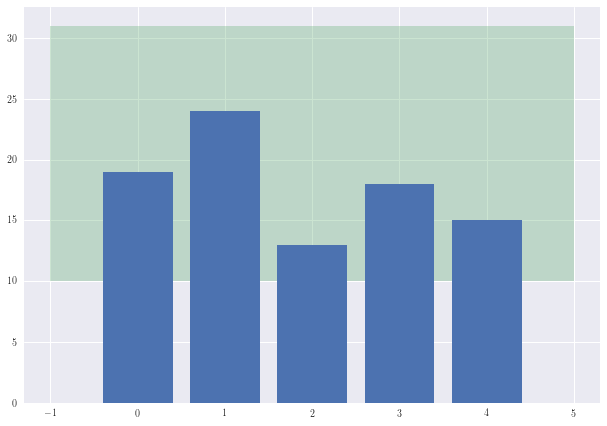

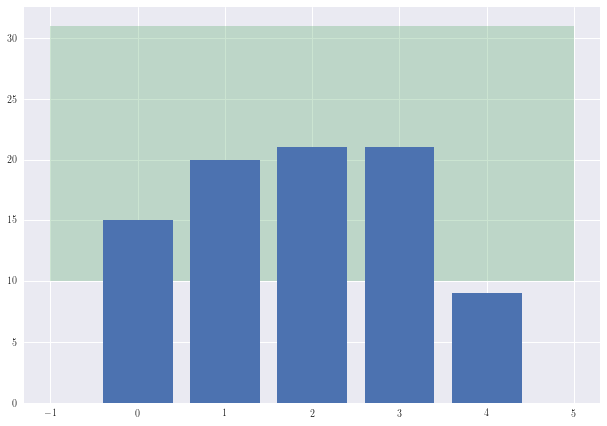

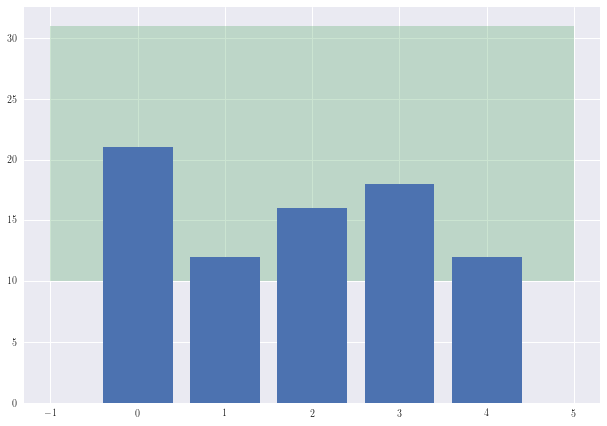

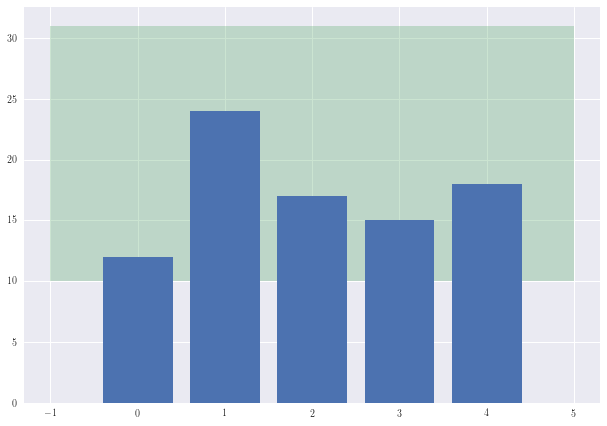

In [41]:
theta_ranks = [snre_b_ranks[:,0], snre_b_ranks[:,1], snre_b_ranks[:,2], snre_b_ranks[:,3]]

for t in theta_ranks:

    nbr_in_bin = np.zeros((1,nbr_bins))

    for i in range(nbr_bins):
        nbr_in_bin[0,i] = sum(t == i)
        
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(np.arange(nbr_bins), nbr_in_bin[0,:])
    ax.fill_between(np.arange(-1, nbr_bins+1, 1),lower*np.ones(nbr_bins+2),upper*np.ones(nbr_bins+2), alpha = 0.3)

## Joint plot

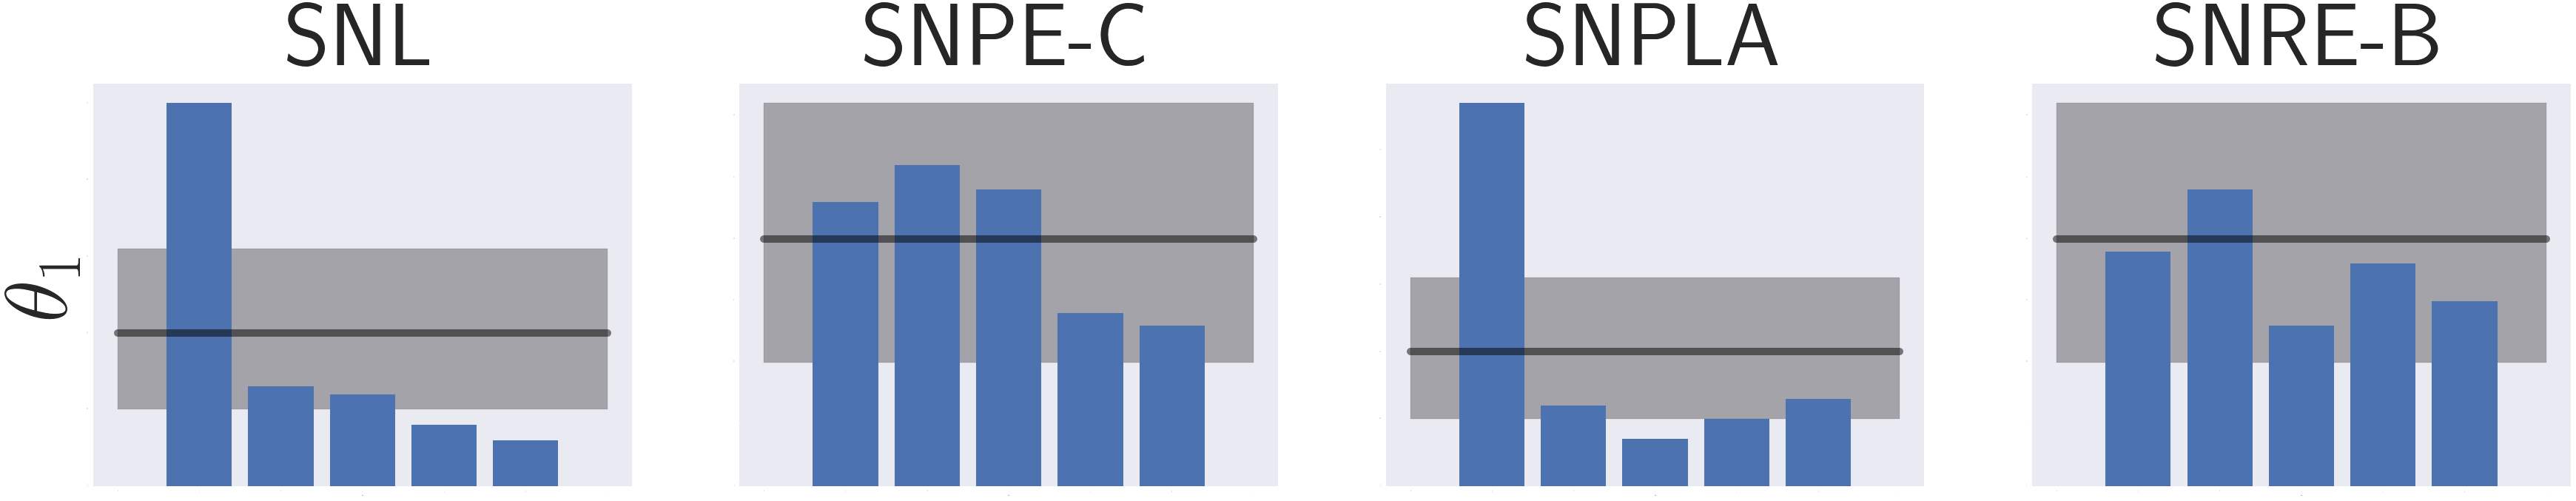

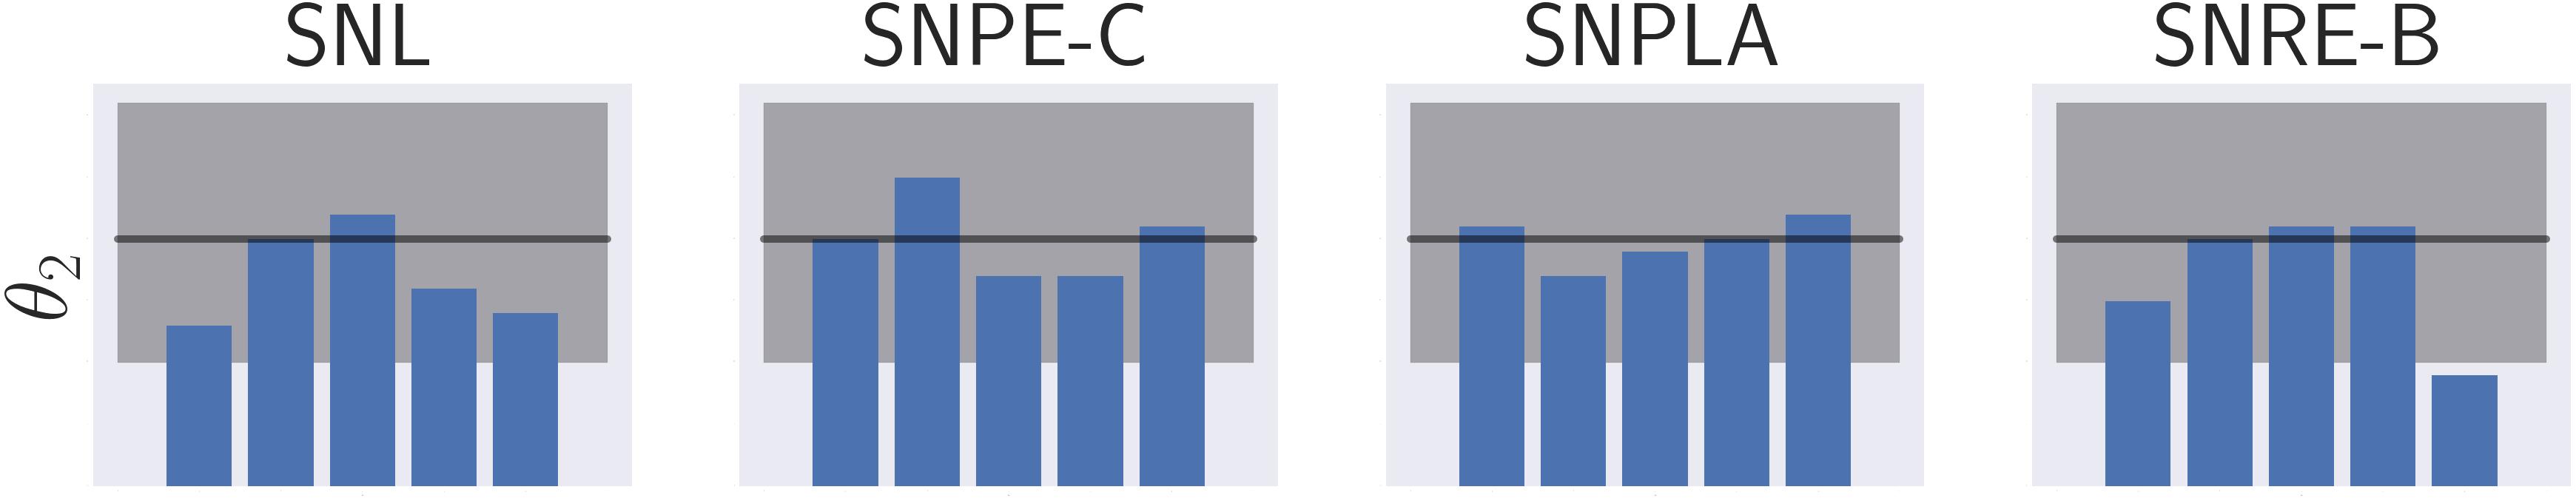

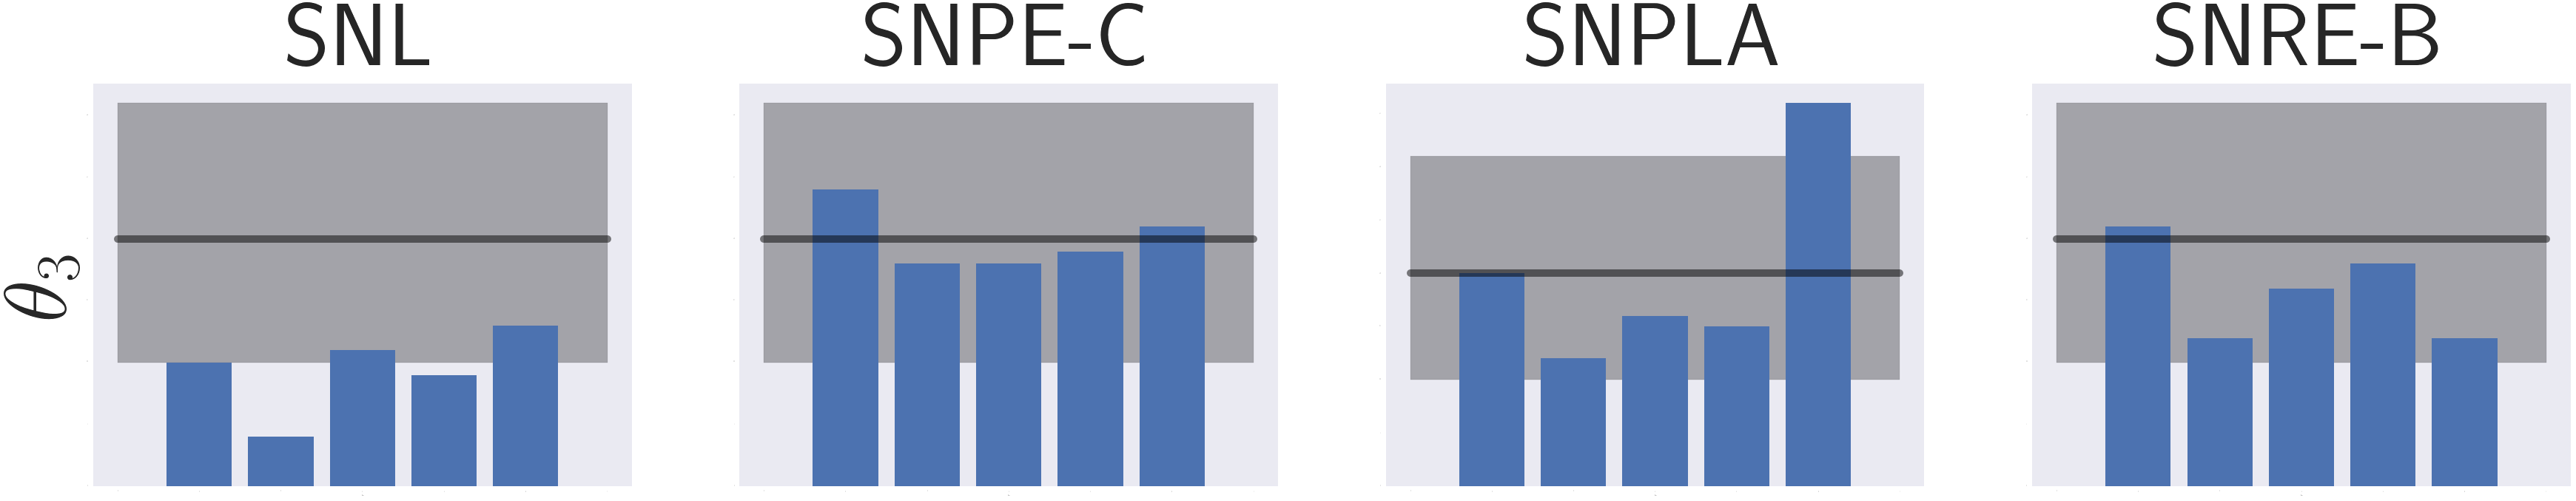

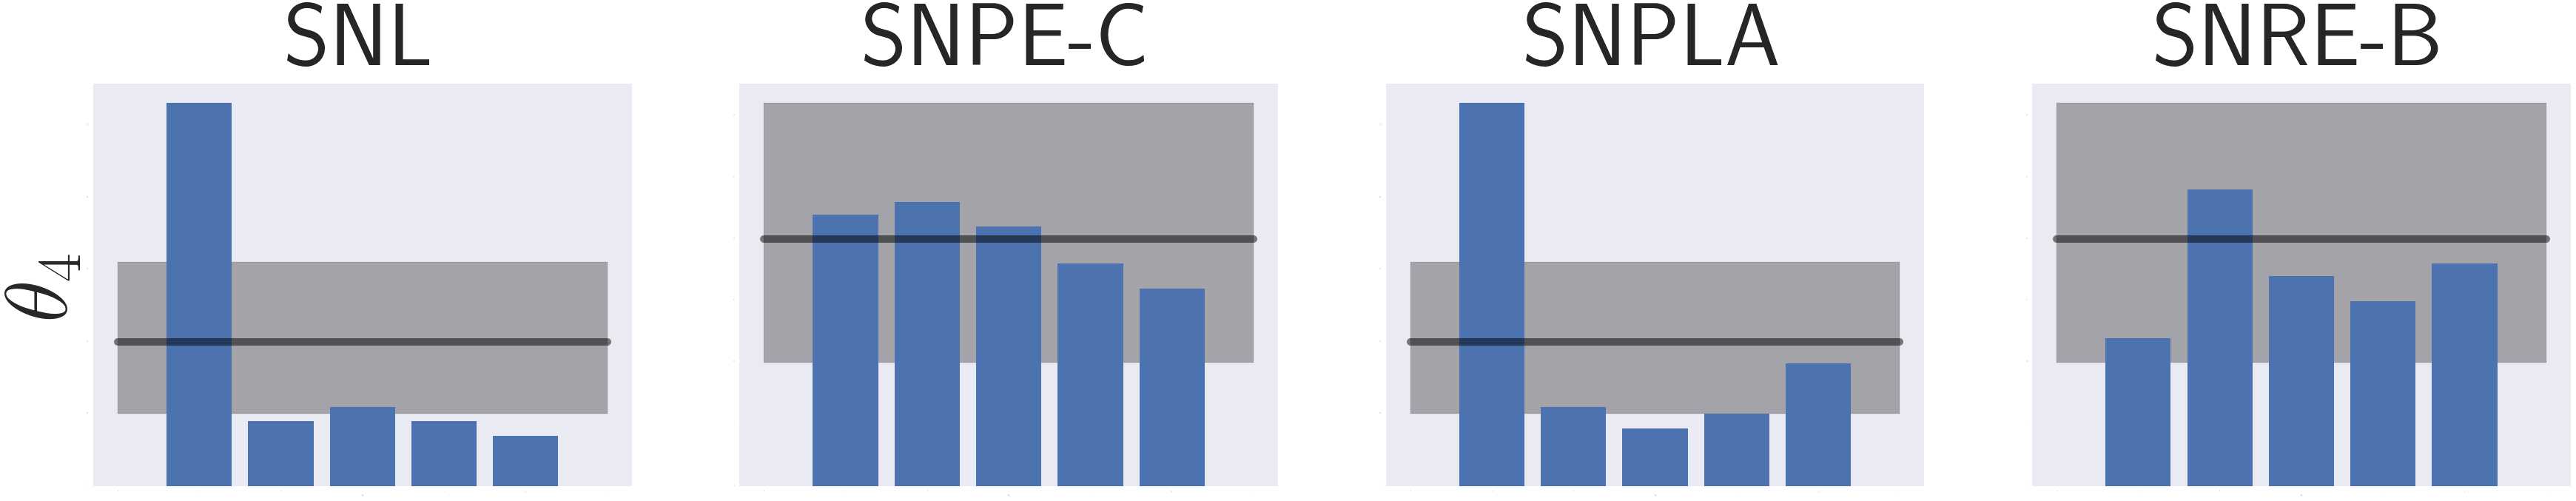

In [90]:
#param = 1

for param in range(4):

    theta_ranks = [snl_ranks[:,param], snpe_c_ranks[:,param], snpla_ranks[:,param], snre_b_ranks[:,param]]

    fig = plt.figure(figsize = (60, 10))
    
    ax1 = fig.add_subplot(1, 4, 1)
    ax2 = fig.add_subplot(1, 4, 2, sharex=ax1) # why arent the axis fixed
    ax3 = fig.add_subplot(1, 4, 3, sharex=ax1)
    ax4 = fig.add_subplot(1, 4, 4, sharex=ax1)
    
    #fig.suptitle(r"$\theta_"+str(param+1)+"$", fontsize=120)
    
    #fig.text(0.5, 0.04, r"$\theta_"+str(param+1)+"$", ha='center', fontsize=150)
    #fig.text(0.04, 0.5, r"$\theta_"+str(param+1)+"$", va='center', rotation='vertical', fontsize=90)

    ax_list = [ax1, ax2, ax3, ax4]

    for t in range(len(theta_ranks)):

        nbr_in_bin = np.zeros((1,nbr_bins))

        for i in range(nbr_bins):
            nbr_in_bin[0,i] = sum(theta_ranks[t] == i)

        ax_list[t].bar(np.arange(nbr_bins), nbr_in_bin[0,:])
        
        ax_list[t].fill_between(np.arange(-1, nbr_bins+1, 1),
                                lower*np.ones(nbr_bins+2),upper*np.ones(nbr_bins+2), 
                                alpha = 0.3, color = "k")
        
        ax_list[t].plot(np.arange(-1, nbr_bins+1, 1), 
                        100*1/nbr_bins*np.ones(nbr_bins+2),
                        color = "k", linewidth=10, alpha = 0.5)

    ax1.set_title("SNL",fontsize=120)
    ax2.set_title("SNPE-C",fontsize=120)
    ax3.set_title("SNPLA",fontsize=120)
    ax4.set_title("SNRE-B",fontsize=120)

    ax1.set_ylabel("Count", fontsize=0)
    
    ax1.set_xlabel("Bins", fontsize=0)
    ax2.set_xlabel("Bins", fontsize=0)
    ax3.set_xlabel("Bins", fontsize=0)
    ax4.set_xlabel("Bins", fontsize=0)

    ax1.set_ylabel(r"$\theta_"+str(param+1)+"$", fontsize=120)

    for ax in ax_list:
        ax.tick_params(axis='both', which='major', labelsize=0)
        ax.tick_params(axis='both', which='minor', labelsize=0)

    for ax in ax_list: 
        ax.tick_params(axis='x', which='major', labelsize=0)
        ax.tick_params(axis='x', which='minor', labelsize=0)
        ax.grid(False)
        
    plt.savefig("./fig/joint_sbc_param_"+str(param+1)+".pdf", bbox_inches='tight')
